# Students:
<font color=orange>  

- Zhe HUANG 22208901 AI
- Mathis REYMOND 22208305 AI
<font>

# Text compression

#### Francesco Saverio Pezzicoli, Guillaume Charpiat 

#### Credits: Vincenzo Schimmenti

## Warm up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
text = ascii(('All human beings are born free and equal in dignity and rights. They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood. Everyone is entitled to all the rights and freedoms set forth in this Declaration, without distinction of any kind, such as race, colour, sex, language, religion, political or other opinion, national or social origin, property, birth or other status. Furthermore, no distinction shall be made on the basis of the political, jurisdictional or international status of the country or territory to which a person belongs, whether it be independent, trust, non-self-governing or under any other limitation of sovereignty. Everyone has the right to life, liberty and security of person. No one shall be held in slavery or servitude; slavery and the slave trade shall be prohibited in all their forms. No one shall be subjected to torture or to cruel, inhuman or degrading treatment or punishment. Everyone has the right to recognition everywhere as a person before the law. All are equal before the law and are entitled without any discrimination to equal protection of the law. All are entitled to equal protection against any discrimination in violation of this Declaration and against any incitement to such discrimination. Everyone has the right to an effective remedy by the competent national tribunals for acts violating the fundamental rights granted him by the constitution or by law. No one shall be subjected to arbitrary arrest, detention or exile. Everyone is entitled in full equality to a fair and public hearing by an independent and impartial tribunal, in the determination of his rights and obligations and of any criminal charge against him.').lower()) #we stick to lower case

We take a dictionary based approach, characters will be dictionary keys and their frequency in the text the dictionary value.

#### <li> Write a function to build character occurrences dictionary: </li>

In [3]:
def compute_char_freq(text):
    """
    Build a chatacter occurrences dictionary
    """
    char_dict = {}
    
    for char in text:
        if char not in char_dict:
            char_dict[char] = 1
        else:
            char_dict[char] += 1
    
    return char_dict

In [4]:
char_dict = compute_char_freq(text)
print(char_dict)

{"'": 2, 'a': 116, 'l': 70, ' ': 278, 'h': 64, 'u': 34, 'm': 21, 'n': 132, 'b': 27, 'e': 157, 'i': 129, 'g': 28, 's': 67, 'r': 108, 'o': 119, 'f': 25, 'd': 52, 'q': 5, 't': 142, 'y': 29, '.': 13, 'w': 12, 'c': 36, 'p': 18, 'v': 15, ',': 19, 'k': 1, 'x': 2, 'j': 3, '-': 2, ';': 1}


#### <li> Plot the frequencies: </li>

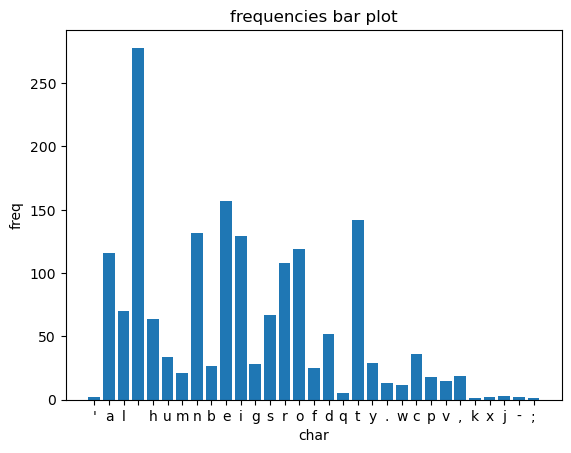

In [5]:
plt.bar(char_dict.keys(), char_dict.values())

plt.xlabel('char')
plt.ylabel('freq')
plt.title('frequencies bar plot')

plt.show()

#### <li> Write a function to create a dictionary with probabilities (normalize frequencies): </li>

In [6]:
def normalize_char_freq(char_dict):
    """
    Create a dictionary with probabilities (normalize frequencies)
    """
    length = 0
    # get the 
    for freq in char_dict.values():
        length += freq

    normalized_char_dict = {}
    for char, freq in char_dict.items():
        normalized_char_dict[char] = freq / length
    
    return normalized_char_dict

In [7]:
normalized_char_dict = normalize_char_freq(char_dict)
print(normalized_char_dict)

{"'": 0.0011580775911986102, 'a': 0.0671685002895194, 'l': 0.04053271569195136, ' ': 0.16097278517660682, 'h': 0.03705848291835553, 'u': 0.019687319050376375, 'm': 0.012159814707585408, 'n': 0.07643312101910828, 'b': 0.01563404748118124, 'e': 0.09090909090909091, 'i': 0.07469600463231037, 'g': 0.016213086276780544, 's': 0.038795599305153444, 'r': 0.06253618992472496, 'o': 0.06890561667631731, 'f': 0.01447596988998263, 'd': 0.030110017371163866, 'q': 0.0028951939779965257, 't': 0.08222350897510133, 'y': 0.01679212507237985, '.': 0.007527504342790967, 'w': 0.006948465547191662, 'c': 0.020845396641574986, 'p': 0.010422698320787493, 'v': 0.008685581933989578, ',': 0.011001737116386797, 'k': 0.0005790387955993051, 'x': 0.0011580775911986102, 'j': 0.0017371163867979154, '-': 0.0011580775911986102, ';': 0.0005790387955993051}


#### <li> Plot the normalized frequencies: </li>

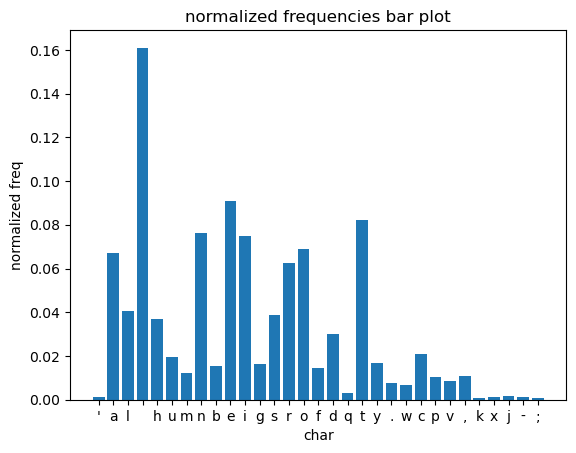

In [8]:
plt.bar(normalized_char_dict.keys(), normalized_char_dict.values())

plt.xlabel('char')
plt.ylabel('normalized freq')
plt.title('normalized frequencies bar plot')

plt.show()

#### <li> Compute the entropy: </li>

In [9]:
# H = - Σ P(x) * np.log2(P(x))
def compute_entropy(normalized_char_dict):
    """
    compute the entropy with the normalized frequencies dictionary
    """
    entropy = 0

    for normalized_freq in normalized_char_dict.values():
        entropy += normalized_freq * np.log2(normalized_freq)
    
    entropy *= (-1)
    
    return entropy

In [10]:
entropy = compute_entropy(normalized_char_dict)
print(entropy)

4.145778481710484


## Compression 

#### <li> Build the Huffman Tree: </li>


Build a function 'huffman_tree' which returns the huffman tree built from a character frequency dictionary. A simple yet powerful approach can be a dictionary. However you can use your preferred method to do so.

As an example:

A <---> 0

B <---> 100

C <----> 101

D <----> 110

E <----> 111

With the dictionary approach this would look like:

d0 = {0 : 'A', 1 : d1 }

where:

d1 = {0 : d2, 1 : d3}

d2 = {0 : 'B', 1 : 'C'}

d3 = {0 : 'D', 1 : 'E'}





<img src="https://upload.wikimedia.org/wikipedia/commons/d/d8/HuffmanCodeAlg.png" width="20%"></img>


In [11]:
class Node(object):
    # Binary Tree Node:
    # symbol is the character;
    # weight is the frequency, zero and one are the two children of the node)
    def __init__(self, weight, symbol=None, zero=None, one=None):
        self.weight = weight
        self.symbol = symbol
        self.zero   = zero
        self.one    = one
        
def Huffman_tree(char_dict):
    def _build(nodes):
        # if nodes contains only one node
        if len(nodes) == 1:
            return nodes[0]
        # if nodes contains at least two nodes
        else:
            # find the smallest node
            node_right = nodes[0]
            for node in nodes:
                if node_right.weight > node.weight:
                    node_right = node
            nodes.remove(node_right)

            # find the second smallest node
            node_left = nodes[0]
            for node in nodes:
                if node_left.weight > node.weight:
                    node_left = node
            nodes.remove(node_left)

            # combine the two smallest node
            new_node = Node(weight=node_left.weight+node_right.weight, zero=node_left, one=node_right)
            nodes.append(new_node)

        return _build(nodes)
    
    nodes = []
    for char, freq in char_dict.items():
        nodes.append(Node(weight=freq, symbol=char))

    return _build(nodes)

In [20]:
htree = Huffman_tree(char_dict)
print(htree.weight == len(text))

True


### <li> Encode a random sentence: </li>

In [13]:
random_sentence = ''.join(list(np.random.choice(a=np.array(list(char_dict.keys())),size=100)))
print(random_sentence)

qcvdcwx.ci sm;u srrtlg-ssq-cxjbtce;,omphjgmiq.kjcbm.hy;yhgjgqesoe'.qnmejnq-xvhfk ;pbhrbnbm,a.js,i.'d


In [21]:
def huffman_encode(text, huffman_tree):
    def construct_code_dict(node, code_word="", code_dict={}):
        """
        recursively traverse a Huffman tree and constructe a dict with the code words
        """
        if node is None:
            return

        # if node is a leaf_node, add the symbol and its code_word to code_dict
        if node.symbol is not None:
            code_dict[node.symbol] = code_word

        # traverse the left and right branches, appending 0 and 1 to the code_word
        construct_code_dict(node.zero, code_word+'0', code_dict)
        construct_code_dict(node.one, code_word+'1', code_dict)

        return code_dict
    
    code_message = []
    code_dict = construct_code_dict(huffman_tree)
    for char in text:
        code_message.append(code_dict[char])

    return "".join(code_message)

In [22]:
encoded_text = huffman_encode(random_sentence,htree)
print(encoded_text)

010001000101110100011101001011110001110100010100100011010111010100000101101011010001001000100000000010110011001111001001000010100010011001010010101000100001000100111011101000101000100010111000101111011111001000100100101100011010101110110101001010001011100001101011010101000100010001100100010010101000101110111100010101011100011001001100000010001001001000000100110000101000101110000101000100011000101011011001000101011000110010001000001110101111001000101100110100010000100010011010001010001000110100110101001000100101000010001001001011011000100100110011000100011100010101011101100011110001100100010110010110110001011000110010001010110100


### <li> Now we want to take the random sentence encoded and decode it back: </li>

In [23]:
def huffman_decode(encoded_text, huffman_tree):
    decoded=[]
    
    node = huffman_tree
    for zero_one in encoded_text:
        # move forward
        if zero_one == '0':
            node = node.zero
        else:
            node = node.one

        # if node is a leaf_node, add the symbol to the decoded text
        if node.symbol is not None:
            decoded.append(node.symbol)
            # node have to go back to the top of tree
            node = huffman_tree
    
    return "".join(decoded)

In [24]:
decoded_text = huffman_decode(encoded_text, htree)
print(decoded_text)

qcvdcwx.ci sm;u srrtlg-ssq-cxjbtce;,omphjgmiq.kjcbm.hy;yhgjgqesoe'.qnmejnq-xvhfk ;pbhrbnbm,a.js,i.'d


### <li> Test: </li>

In [25]:
if(random_sentence==decoded_text):
    print('Encoding and decoding was successfull!')
else:
    print('Some errors occurred!')

Encoding and decoding was successfull!


In [26]:
# 'len(encoded_text)'    is the number of 0s and 1s used to encode the random sentence
# 'len(random_sentence)' is the number of characters * 1byte for ASCII encoding
print('Compression ratio (bits): %f' % (len(encoded_text)/(8.0*len(random_sentence))))

Compression ratio (bits): 0.795000
